#### **Inner product**
dot pdt. -> transform
#### **Outer product**
cross pdt:  v1[1, 2] v2[3, 4] ==> [[3, 4], [6, 8]
#### **Kronecker product** (https://en.wikipedia.org/wiki/Kronecker_product)

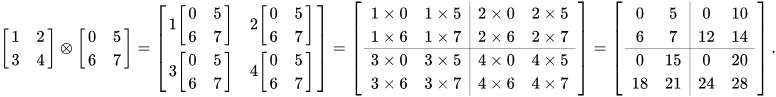

# Using outer product for Image enrichment

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

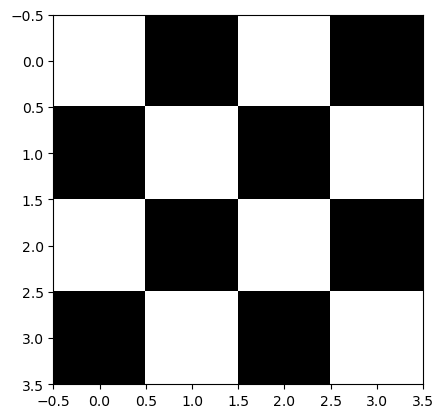

In [8]:
x = [1, -1, 1, -1]
img = np.outer(x, x)
plt.imshow(img, cmap="gray")

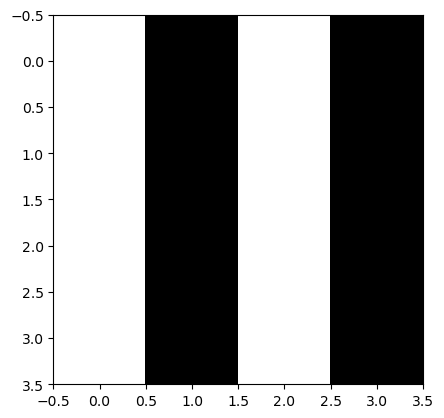

In [9]:
x1 = [1, 1, 1, 1]
x2 = [1, -1, 1, -1]
img = np.outer(x1, x2)
plt.imshow(img, cmap="gray")

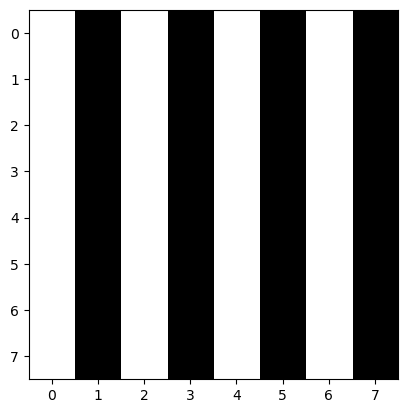

In [10]:
x1 = [1, 1, 1, 1, 1, 1, 1, 1]
x2 = [1, -1, 1, -1, 1, -1, 1, -1]
img = np.outer(x1, x2)
plt.imshow(img, cmap="gray")

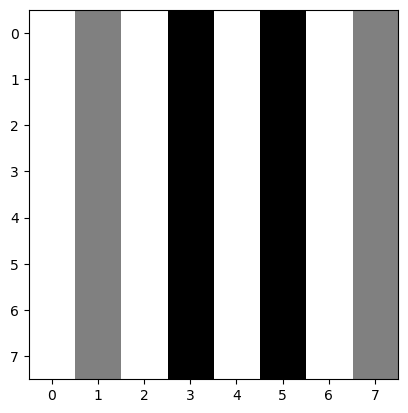

In [15]:
x1 = [1, 1, 1, 1, 1, 1, 1, 1]
x2 = [1, 0, 1, -1, 1, -1, 1, 0]
img = np.outer(x1, x2)
plt.imshow(img, cmap="gray")

### Task: (How to?) Generate different test patterns with outer product

# Kronecker Product

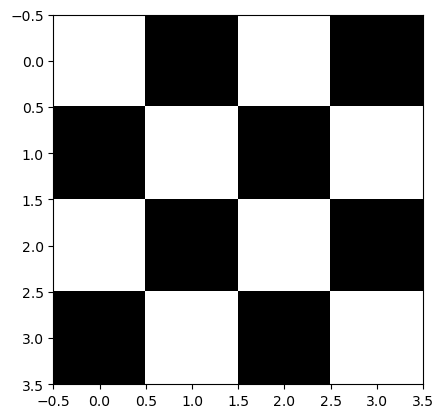

In [16]:
x1 = [[1, 1], [1, 1]]
x2 = [[1, -1], [-1, 1]]

img = np.kron(x1, x2)
plt.imshow(img, cmap="gray")

### Task: Generate different test patterns using the idea of (a) outer pdt. and (b) kronecker pdt.

# Image Enhancement
- Spatial domain
- Freq. domain

### x(m, n) -> `h(m, n)` -> y(m, n)

where,
- m, n -> spatial characteristics
- h -> intelligence (e.g. HPF, LPF, etc.)

#### Relationship b/w y and x ? 
y(m, n) = x(m, n) `(convolution)` h(m, n)

#### Rules to use:
### 1. Convolution in time/space domain = Multiplcation in frequency domain.
- X(k, l) -> `H(k, l)` -> Y(k, l)
- relationship here: Y(k, l) = X(k, l) `(multiplcation)` H(k, l) 
- H is the intelligence here
    
so,    
x(m, n) -> `FFT` -> `X(k, l)` -> `H(k, l)` -> `Y(k, l)` -> `IFFT`  -> y(m, n)

where the whole intelligence lies in `H(k, l)`

#### Various `H(k, l)`:
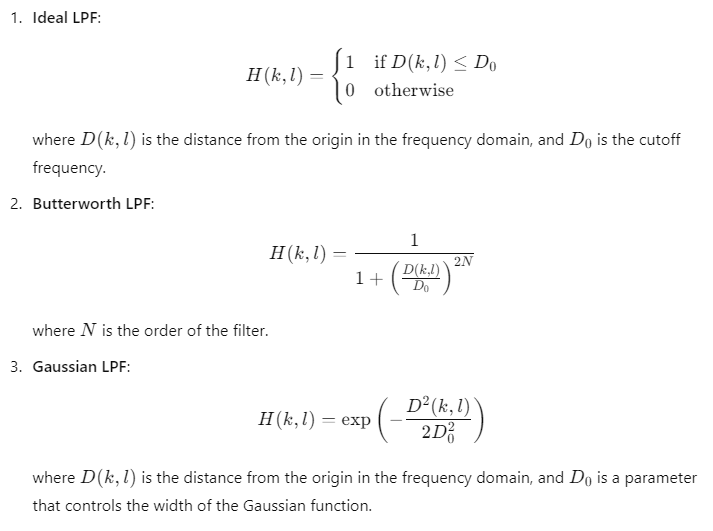

In [57]:
size = 256
x = np.arange(-size/2, size/2, 1)
y = x
k, l = np.meshgrid(x, y)
D = np.sqrt(k**2 + l**2)
D0 = 50

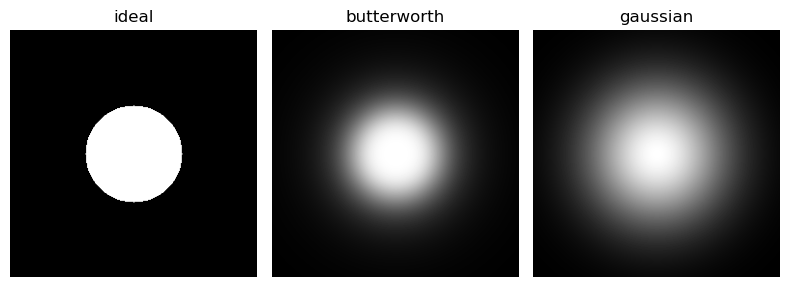

In [58]:
# Ideal LPF (ideal because strict, not-possible-in-real-life transition)
H_ideal = D <= D0

# Butterworth LPF (sloowwwww transition)
N = 2
H_butterworth = 1 / (1 + (D/D0)**(2*N))

# Gaussian LPF (sloowwwww transition)
H_gaussian = np.exp(-D**2/(2*D0**2))

plt.figure(figsize=(8, 8))

plt.subplot(131), plt.imshow(H_ideal, cmap="gray"), plt.title("ideal"), plt.axis("off")
plt.subplot(132), plt.imshow(H_butterworth, cmap="gray"), plt.title("butterworth"), plt.axis("off")
plt.subplot(133), plt.imshow(H_gaussian, cmap="gray"), plt.title("gaussian"), plt.axis("off")

plt.tight_layout()

# Performing LPF in Frequency domain
x(m, n) -> `FFT` -> `X(k, l)` -> `H(k, l)` -> `Y(k, l)` -> `IFFT`  -> y(m, n)

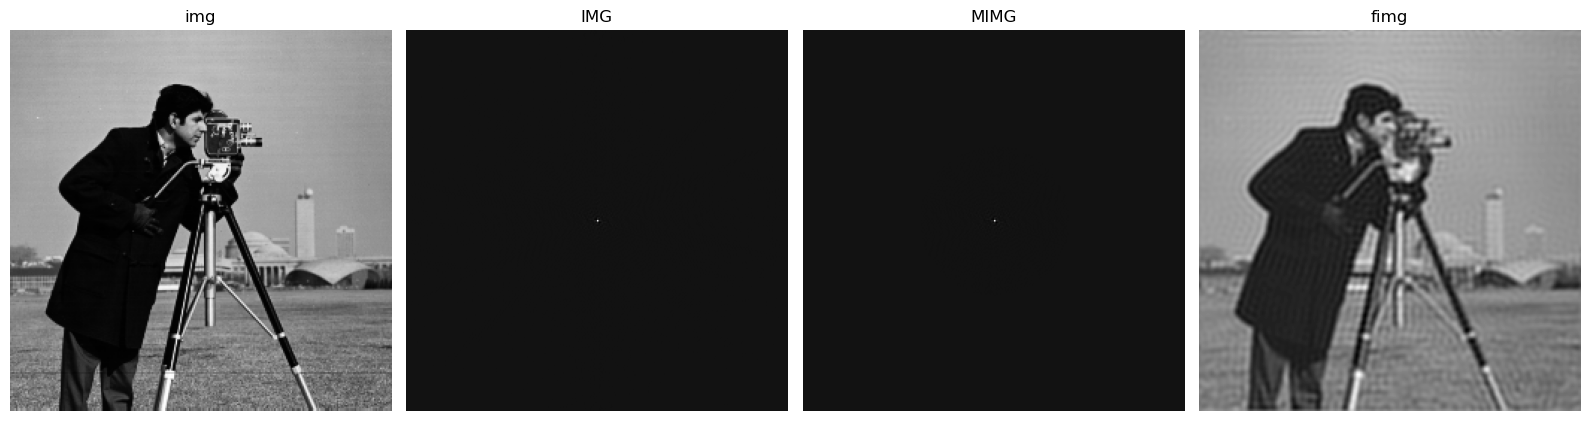

In [60]:
# 1: Reading the input image
img = cv.imread("cameraman.tif", cv.IMREAD_GRAYSCALE)
IMG = np.fft.fftshift(np.fft.fft2(img))

# 2: Define H(k, l)
# Using H(k, l) from previous cells...

# 3. Multiply X(K, l) with H(k, l)
MIMG = np.multiply(IMG, H_ideal)
fimg = np.fft.ifft2(np.fft.ifftshift(MIMG))

# TypeError: Image data of dtype complex128 cannot be converted to float
fimg = np.real(fimg)

plt.figure(figsize=(16, 16))

plt.subplot(141), plt.imshow(img, cmap="gray"), plt.title("img"), plt.axis("off")
plt.subplot(142), plt.imshow(np.real(IMG), cmap="gray"), plt.title("IMG"), plt.axis("off")
plt.subplot(143), plt.imshow(np.real(MIMG), cmap="gray"), plt.title("MIMG"), plt.axis("off")
plt.subplot(144), plt.imshow(fimg, cmap="gray"), plt.title("fimg"), plt.axis("off")

plt.tight_layout()

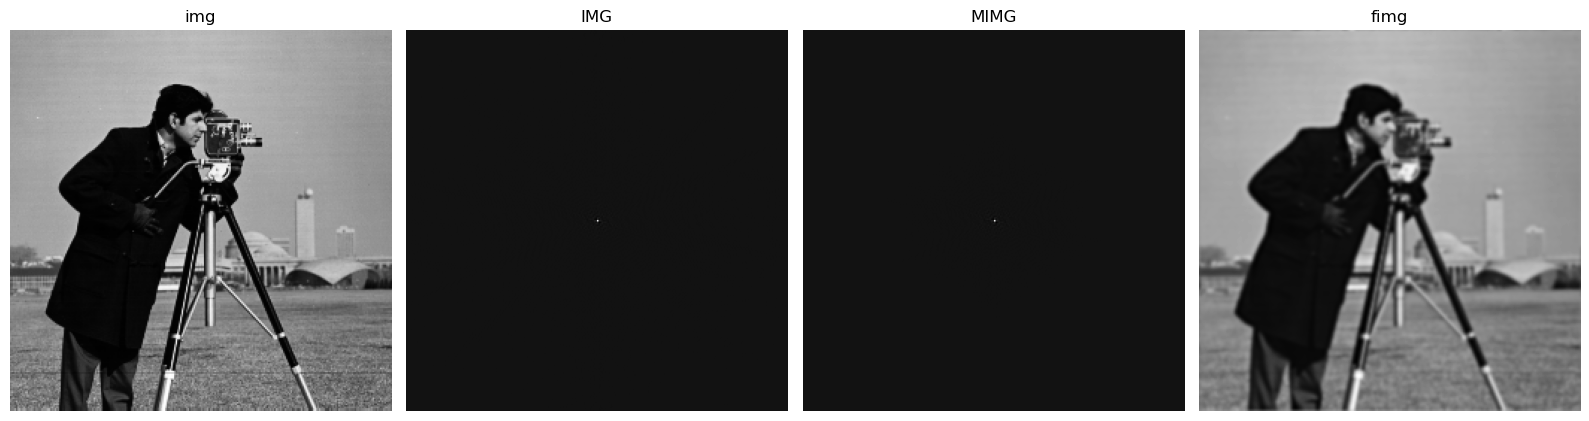

In [61]:
# 1: Reading the input image
img = cv.imread("cameraman.tif", cv.IMREAD_GRAYSCALE)
IMG = np.fft.fftshift(np.fft.fft2(img))

# 2: Define H(k, l)
# Using H(k, l) from previous cells...

# 3. Multiply X(K, l) with H(k, l)
MIMG = np.multiply(IMG, H_butterworth)
fimg = np.fft.ifft2(np.fft.ifftshift(MIMG))

# TypeError: Image data of dtype complex128 cannot be converted to float
fimg = np.real(fimg)

plt.figure(figsize=(16, 16))

plt.subplot(141), plt.imshow(img, cmap="gray"), plt.title("img"), plt.axis("off")
plt.subplot(142), plt.imshow(np.real(IMG), cmap="gray"), plt.title("IMG"), plt.axis("off")
plt.subplot(143), plt.imshow(np.real(MIMG), cmap="gray"), plt.title("MIMG"), plt.axis("off")
plt.subplot(144), plt.imshow(fimg, cmap="gray"), plt.title("fimg"), plt.axis("off")

plt.tight_layout()

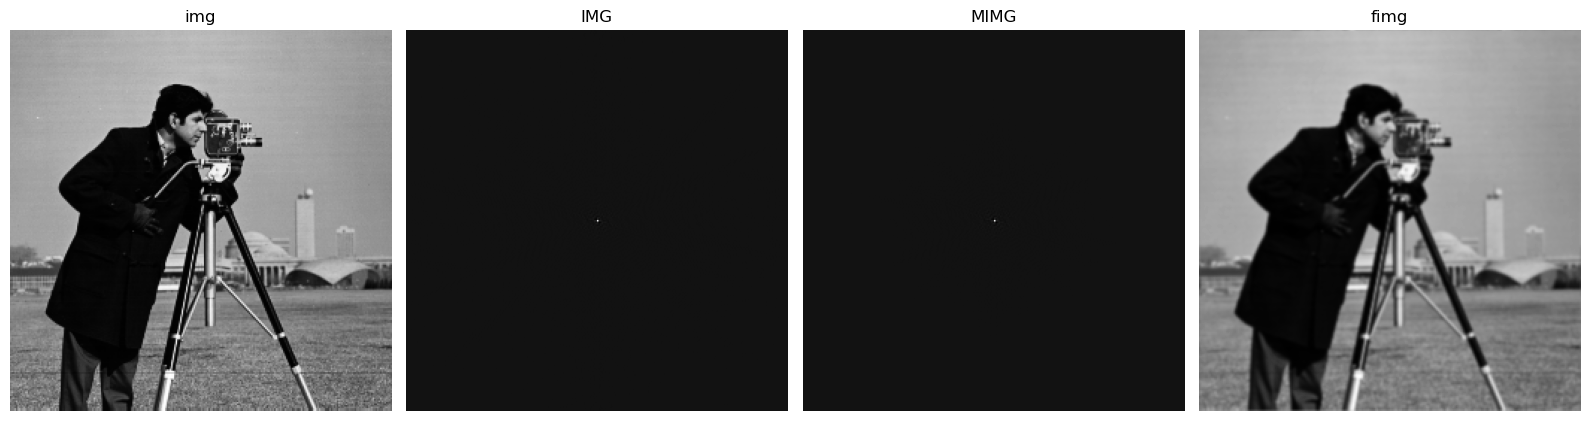

In [62]:
# 1: Reading the input image
img = cv.imread("cameraman.tif", cv.IMREAD_GRAYSCALE)
IMG = np.fft.fftshift(np.fft.fft2(img))

# 2: Define H(k, l)
# Using H(k, l) from previous cells...

# 3. Multiply X(K, l) with H(k, l)
MIMG = np.multiply(IMG, H_gaussian)
fimg = np.fft.ifft2(np.fft.ifftshift(MIMG))

# TypeError: Image data of dtype complex128 cannot be converted to float
fimg = np.real(fimg)

plt.figure(figsize=(16, 16))

plt.subplot(141), plt.imshow(img, cmap="gray"), plt.title("img"), plt.axis("off")
plt.subplot(142), plt.imshow(np.real(IMG), cmap="gray"), plt.title("IMG"), plt.axis("off")
plt.subplot(143), plt.imshow(np.real(MIMG), cmap="gray"), plt.title("MIMG"), plt.axis("off")
plt.subplot(144), plt.imshow(fimg, cmap="gray"), plt.title("fimg"), plt.axis("off")

plt.tight_layout()